<small><i>This notebook was prepared by [Donne Martin](http://donnemartin.com). Source and license info is on [GitHub](https://github.com/donnemartin/data-science-ipython-notebooks).</i></small>

# Pandas

Credits: The following are notes taken while working through [Python for Data Analysis](http://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1449319793) by Wes McKinney

* Series
* DataFrame
* Reindexing
* Dropping Entries
* Indexing, Selecting, Filtering
* Arithmetic and Data Alignment
* Function Application and Mapping
* Sorting and Ranking
* Axis Indices with Duplicate Values
* Summarizing and Computing Descriptive Statistics
* Cleaning Data (Under Construction)
* Input and Output (Under Construction)

In [8]:
%matplotlib inline
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

## Series

A Series is a one-dimensional array-like object containing an array of data and an associated array of data labels.  The data can be any NumPy data type and the labels are the Series' index.

Create a Series:

In [3]:
ser_1 = Series([1, 1, 2, -3, -5, 8, 13])
ser_1

0     1
1     1
2     2
3    -3
4    -5
5     8
6    13
dtype: int64

Get the array representation of a Series:

In [4]:
ser_1.values

array([ 1,  1,  2, -3, -5,  8, 13])

Index objects are immutable and hold the axis labels and metadata such as names and axis names.

Get the index of the Series:

In [5]:
ser_1.index

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

Create a Series with a custom index:

In [6]:
ser_2 = Series([1, 1, 2, -3, -5], index=['a', 'b', 'c', 'd', 'e'])
ser_2

a    1
b    1
c    2
d   -3
e   -5
dtype: int64

Get a value from a Series:

In [7]:
ser_2[4] == ser_2['e']

True

Get a set of values from a Series by passing in a list:

In [8]:
ser_2[['c', 'a', 'b']]

c    2
a    1
b    1
dtype: int64

Get values great than 0:

In [9]:
ser_2[ser_2 > 0]

a    1
b    1
c    2
dtype: int64

Scalar multiply:

In [117]:
type(ser_2)

pandas.core.series.Series

In [10]:
ser_2 * 2

a     2
b     2
c     4
d    -6
e   -10
dtype: int64

Apply a numpy math function:

In [119]:
import numpy as np
np.exp(ser_2)#可以将其当做一个array对数值进行处理啊


a    1.000000
b    1.000000
c    7.389056
d    0.049787
e    0.006738
dtype: float64

In [120]:
a = np.array([1,2,3,4])
np.exp(a)

array([  2.71828183,   7.3890561 ,  20.08553692,  54.59815003])

A Series is like a fixed-length, ordered dict.  

Create a series by passing in a dict:

In [12]:
dict_1 = {'foo' : 100, 'bar' : 200, 'baz' : 300}
ser_3 = Series(dict_1)#可以将字典转换成pandas.series
ser_3

bar    200
baz    300
foo    100
dtype: int64

Re-order a Series by passing in an index (indices not found are NaN):

In [13]:
index = ['foo', 'bar', 'baz', 'qux']
ser_4 = Series(dict_1, index=index)#有三个数但有四个index则会有一个是空
ser_4

foo    100
bar    200
baz    300
qux    NaN
dtype: float64

Check for NaN with the pandas method:

In [14]:
pd.isnull(ser_4)

foo    False
bar    False
baz    False
qux     True
dtype: bool

Check for NaN with the Series method:

In [15]:
ser_4.isnull()

foo    False
bar    False
baz    False
qux     True
dtype: bool

Series automatically aligns differently indexed data in arithmetic operations:

In [16]:
ser_3 + ser_4

bar    400
baz    600
foo    200
qux    NaN
dtype: float64

Name a Series:

In [17]:
ser_4.name = 'foobarbazqux'

Name a Series index:

In [18]:
ser_4.index.name = 'label'

In [19]:
ser_4

label
foo    100
bar    200
baz    300
qux    NaN
Name: foobarbazqux, dtype: float64

Rename a Series' index in place:

In [20]:
ser_4.index = ['fo', 'br', 'bz', 'qx']
ser_4

fo    100
br    200
bz    300
qx    NaN
Name: foobarbazqux, dtype: float64

## DataFrame

A DataFrame is a tabular data structure containing an ordered collection of columns.  Each column can have a different type.  DataFrames have both row and column indices and is analogous to a dict of Series.  Row and column operations are treated roughly symmetrically.  Columns returned when indexing a DataFrame are views of the underlying data, not a copy.  To obtain a copy, use the Series' copy method.

Create a DataFrame:

In [122]:
data_1 = {'state' : ['VA', 'VA', 'VA', 'MD', 'MD'],
          'year' : [2012, 2013, 2014, 2014, 2015],
          'pop' : [5.0, 5.1, 5.2, 4.0, 4.1]}
df_1 = DataFrame(data_1,index=[1,2,3,4,5])
df_1

,pop,state,year
1,5.0,VA,2012
2,5.1,VA,2013
3,5.2,VA,2014
4,4.0,MD,2014
5,4.1,MD,2015


Create a DataFrame specifying a sequence of columns:

In [22]:
df_2 = DataFrame(data_1, columns=['year', 'state', 'pop'])#这样就可以有顺序了
df_2

,year,state,pop
0,2012,VA,5.0
1,2013,VA,5.1
2,2014,VA,5.2
3,2014,MD,4.0
4,2015,MD,4.1


Like Series, columns that are not present in the data are NaN:

In [23]:
df_3 = DataFrame(data_1, columns=['year', 'state', 'pop', 'unempl'])
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,NaN
3,2014,MD,4.0,NaN
4,2015,MD,4.1,NaN


Retrieve a column by key, returning a Series:


In [24]:
df_3['state']

0    VA
1    VA
2    VA
3    MD
4    MD
Name: state, dtype: object

Retrive a column by attribute, returning a Series:

In [25]:
df_3.year

0    2012
1    2013
2    2014
3    2014
4    2015
Name: year, dtype: int64

In [123]:
df_3.year[0]

2012

In [140]:
df_3.index=[1,2,3,4,5]
df_3

,a,a,a
1,6.0,NY,2012
2,6.1,NY,2013
3,6.2,NY,2014
4,3.0,FL,2014
5,3.1,FL,2015


In [143]:
df_3.columns = ['year', 'state', 'pop']
df_3#都可以重复，但是搜索的时候都可以出来， 这里个概念还是要一列一列的列向量的形式

,year,state,pop
1,6.0,NY,2012
2,6.1,NY,2013
3,6.2,NY,2014
4,3.0,FL,2014
5,3.1,FL,2015


Retrieve a row by position:

In [145]:
df_3.ix[1]

year        6
state      NY
pop      2012
Name: 1, dtype: object

In [153]:
df_3.year[1]  #并不是0开始的，这里仍然是index

6.0

Update a column by assignment:

In [154]:
df_3['unempl'] = np.arange(5)
df_3

,year,state,pop,unempl
1,6.0,NY,2012,0
2,6.1,NY,2013,1
3,6.2,NY,2014,2
4,3.0,FL,2014,3
5,3.1,FL,2015,4


Assign a Series to a column (note if assigning a list or array, the length must match the DataFrame, unlike a Series):

In [28]:
unempl = Series([6.0, 6.0, 6.1], index=[2, 3, 4])
df_3['unempl'] = unempl
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


Assign a new column that doesn't exist to create a new column:

In [29]:
df_3['state_dup'] = df_3['state']#对一个之前没有的列向量相当于增加了一列
df_3

,year,state,pop,unempl,state_dup
0,2012,VA,5.0,NaN,VA
1,2013,VA,5.1,NaN,VA
2,2014,VA,5.2,6.0,VA
3,2014,MD,4.0,6.0,MD
4,2015,MD,4.1,6.1,MD


Delete a column:

In [30]:
del df_3['state_dup']
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


Create a DataFrame from a nested dict of dicts (the keys in the inner dicts are unioned and sorted to form the index in the result, unless an explicit index is specified):

In [165]:
pop = {'VA' : {2013 : 5.1, 2014 : 5.2},
       'MD' : {2014 : 4.0, 2015 : 4.1}}
df_4 = DataFrame(pop)
df_4

,MD,VA
2013,NaN,5.1
2014,4.0,5.2
2015,4.1,NaN


In [162]:
df_4['VA'][2013]#原来的字典调用依然是有效的

5.0999999999999996

In [167]:
df_4.ix[2013]

MD    NaN
VA    5.1
Name: 2013, dtype: float64

Transpose the DataFrame:

In [32]:
df_4.T

,2013,2014,2015
MD,NaN,4.0,4.1
VA,5.1,5.2,NaN


Create a DataFrame from a dict of Series:

In [33]:
data_2 = {'VA' : df_4['VA'][1:],
          'MD' : df_4['MD'][2:]}
df_5 = DataFrame(data_2)
df_5

,MD,VA
2014,NaN,5.2
2015,4.1,NaN


Set the DataFrame index name:

In [34]:
df_5.index.name = 'year'
df_5

,MD,VA
year,,
2014,NaN,5.2
2015,4.1,NaN


Set the DataFrame columns name:

In [35]:
df_5.columns.name = 'state'
df_5

state,MD,VA
year,,
2014,NaN,5.2
2015,4.1,NaN


Return the data contained in a DataFrame as a 2D ndarray:

In [36]:
df_5.values

array([[ nan,  5.2],
       [ 4.1,  nan]])

If the columns are different dtypes, the 2D ndarray's dtype will accomodate all of the columns:

In [37]:
df_3.values

array([[2012, 'VA', 5.0, nan],
       [2013, 'VA', 5.1, nan],
       [2014, 'VA', 5.2, 6.0],
       [2014, 'MD', 4.0, 6.0],
       [2015, 'MD', 4.1, 6.1]], dtype=object)

## Reindexing

Create a new object with the data conformed to a new index.  Any missing values are set to NaN.

In [38]:
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


Reindexing rows returns a new frame with the specified index:

In [39]:
df_3.reindex(list(reversed(range(0, 6))))

,year,state,pop,unempl
5,NaN,NaN,NaN,NaN
4,2015,MD,4.1,6.1
3,2014,MD,4.0,6.0
2,2014,VA,5.2,6.0
1,2013,VA,5.1,NaN
0,2012,VA,5.0,NaN


Missing values can be set to something other than NaN:

In [40]:
df_3.reindex(range(6, 0), fill_value=0)

,year,state,pop,unempl


Interpolate ordered data like a time series:

In [41]:
ser_5 = Series(['foo', 'bar', 'baz'], index=[0, 2, 4])

In [42]:
ser_5.reindex(range(5), method='ffill')

0    foo
1    foo
2    bar
3    bar
4    baz
dtype: object

In [43]:
ser_5.reindex(range(5), method='bfill')

0    foo
1    bar
2    bar
3    baz
4    baz
dtype: object

Reindex columns:

In [44]:
df_3.reindex(columns=['state', 'pop', 'unempl', 'year'])

,state,pop,unempl,year
0,VA,5.0,NaN,2012
1,VA,5.1,NaN,2013
2,VA,5.2,6.0,2014
3,MD,4.0,6.0,2014
4,MD,4.1,6.1,2015


Reindex rows and columns while filling rows:

In [45]:
df_3.reindex(index=list(reversed(range(0, 6))),
             fill_value=0,
             columns=['state', 'pop', 'unempl', 'year'])

,state,pop,unempl,year
5,0,0.0,0.0,0
4,MD,4.1,6.1,2015
3,MD,4.0,6.0,2014
2,VA,5.2,6.0,2014
1,VA,5.1,NaN,2013
0,VA,5.0,NaN,2012


Reindex using ix:

In [46]:
df_6 = df_3.ix[range(0, 7), ['state', 'pop', 'unempl', 'year']]
df_6

,state,pop,unempl,year
0,VA,5.0,NaN,2012
1,VA,5.1,NaN,2013
2,VA,5.2,6.0,2014
3,MD,4.0,6.0,2014
4,MD,4.1,6.1,2015
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN


## Dropping Entries

Drop rows from a Series or DataFrame:

In [47]:
df_7 = df_6.drop([0, 1])
df_7

,state,pop,unempl,year
2,VA,5.2,6.0,2014
3,MD,4.0,6.0,2014
4,MD,4.1,6.1,2015
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN


Drop columns from a DataFrame:

In [48]:
df_7 = df_7.drop('unempl', axis=1)
df_7

,state,pop,year
2,VA,5.2,2014
3,MD,4.0,2014
4,MD,4.1,2015
5,NaN,NaN,NaN
6,NaN,NaN,NaN


## Indexing, Selecting, Filtering

Series indexing is similar to NumPy array indexing with the added bonus of being able to use the Series' index values.

In [49]:
ser_2

a    1
b    1
c    2
d   -3
e   -5
dtype: int64

Select a value from a Series:

In [168]:
ser_2[0] == ser_2['a']

True

Select a slice from a Series:

In [51]:
ser_2[1:4]

b    1
c    2
d   -3
dtype: int64

Select specific values from a Series:

In [52]:
ser_2[['b', 'c', 'd']]

b    1
c    2
d   -3
dtype: int64

Select from a Series based on a filter:

In [53]:
ser_2[ser_2 > 0]

a    1
b    1
c    2
dtype: int64

Select a slice from a Series with labels (note the end point is inclusive):

In [54]:
ser_2['a':'b']

a    1
b    1
dtype: int64

Assign to a Series slice (note the end point is inclusive):

In [55]:
ser_2['a':'b'] = 0
ser_2

a    0
b    0
c    2
d   -3
e   -5
dtype: int64

Pandas supports indexing into a DataFrame.

In [56]:
df_6

,state,pop,unempl,year
0,VA,5.0,NaN,2012
1,VA,5.1,NaN,2013
2,VA,5.2,6.0,2014
3,MD,4.0,6.0,2014
4,MD,4.1,6.1,2015
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN


Select specified columns from a DataFrame:

In [57]:
df_6[['pop', 'unempl']]

,pop,unempl
0,5.0,NaN
1,5.1,NaN
2,5.2,6.0
3,4.0,6.0
4,4.1,6.1
5,NaN,NaN
6,NaN,NaN


Select a slice from a DataFrame:

In [58]:
df_6[:2]

,state,pop,unempl,year
0,VA,5.0,NaN,2012
1,VA,5.1,NaN,2013


Select from a DataFrame based on a filter:

In [59]:
df_6[df_6['pop'] > 5]

,state,pop,unempl,year
1,VA,5.1,NaN,2013
2,VA,5.2,6,2014


Perform a scalar comparison on a DataFrame:

In [60]:
df_6 > 5

,state,pop,unempl,year
0,True,False,False,True
1,True,True,False,True
2,True,True,True,True
3,True,False,True,True
4,True,False,True,True
5,False,False,False,False
6,False,False,False,False


Perform a scalar comparison on a DataFrame, retain the values that pass the filter:

In [61]:
df_6[df_6 > 5]

,state,pop,unempl,year
0,VA,NaN,NaN,2012
1,VA,5.1,NaN,2013
2,VA,5.2,6.0,2014
3,MD,NaN,6.0,2014
4,MD,NaN,6.1,2015
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN


Select a slice of rows from a DataFrame (note the end point is inclusive):

In [62]:
df_6.ix[2:3]

,state,pop,unempl,year
2,VA,5.2,6,2014
3,MD,4.0,6,2014


Select a slice of rows from a specific column of a DataFrame:

In [171]:
df_6.ix[0:2, 'pop']

0    5.0
1    5.1
2    5.2
Name: pop, dtype: float64

Select rows based on an arithmetic operation on a specific row:

In [64]:
df_6.ix[df_6.unempl > 5.0]

,state,pop,unempl,year
2,VA,5.2,6.0,2014
3,MD,4.0,6.0,2014
4,MD,4.1,6.1,2015


## Arithmetic and Data Alignment

Adding Series objects results in the union of index pairs if the pairs are not the same, resulting in NaN for indices that do not overlap:

In [65]:
np.random.seed(0)
ser_6 = Series(np.random.randn(5),
               index=['a', 'b', 'c', 'd', 'e'])
ser_6

a    1.764052
b    0.400157
c    0.978738
d    2.240893
e    1.867558
dtype: float64

In [66]:
np.random.seed(1)
ser_7 = Series(np.random.randn(5),
               index=['a', 'c', 'e', 'f', 'g'])
ser_7

a    1.624345
c   -0.611756
e   -0.528172
f   -1.072969
g    0.865408
dtype: float64

In [67]:
ser_6 + ser_7

a    3.388398
b         NaN
c    0.366982
d         NaN
e    1.339386
f         NaN
g         NaN
dtype: float64

Set a fill value instead of NaN for indices that do not overlap:

In [68]:
ser_6.add(ser_7, fill_value=0)

a    3.388398
b    0.400157
c    0.366982
d    2.240893
e    1.339386
f   -1.072969
g    0.865408
dtype: float64

Adding DataFrame objects results in the union of index pairs for rows and columns if the pairs are not the same, resulting in NaN for indices that do not overlap:

In [69]:
np.random.seed(0)
df_8 = DataFrame(np.random.rand(9).reshape((3, 3)),
                 columns=['a', 'b', 'c'])
df_8

,a,b,c
0,0.548814,0.715189,0.602763
1,0.544883,0.423655,0.645894
2,0.437587,0.891773,0.963663


In [70]:
np.random.seed(1)
df_9 = DataFrame(np.random.rand(9).reshape((3, 3)),
                 columns=['b', 'c', 'd'])
df_9

,b,c,d
0,0.417022,0.720324,0.000114
1,0.302333,0.146756,0.092339
2,0.186260,0.345561,0.396767


In [71]:
df_8 + df_9

,a,b,c,d
0,NaN,1.132211,1.323088,NaN
1,NaN,0.725987,0.792650,NaN
2,NaN,1.078033,1.309223,NaN


Set a fill value instead of NaN for indices that do not overlap:

In [72]:
df_10 = df_8.add(df_9, fill_value=0)
df_10

,a,b,c,d
0,0.548814,1.132211,1.323088,0.000114
1,0.544883,0.725987,0.792650,0.092339
2,0.437587,1.078033,1.309223,0.396767


Like NumPy, pandas supports arithmetic operations between DataFrames and Series.

Match the index of the Series on the DataFrame's columns, broadcasting down the rows:

In [73]:
ser_8 = df_10.ix[0]
df_11 = df_10 - ser_8
df_11

,a,b,c,d
0,0.000000,0.000000,0.000000,0.000000
1,-0.003930,-0.406224,-0.530438,0.092224
2,-0.111226,-0.054178,-0.013864,0.396653


Match the index of the Series on the DataFrame's columns, broadcasting down the rows and union the indices that do not match:

In [74]:
ser_9 = Series(range(3), index=['a', 'd', 'e'])
ser_9

a    0
d    1
e    2
dtype: int64

In [75]:
df_11 - ser_9

,a,b,c,d,e
0,0.000000,NaN,NaN,-1.000000,NaN
1,-0.003930,NaN,NaN,-0.907776,NaN
2,-0.111226,NaN,NaN,-0.603347,NaN


Broadcast over the columns and match the rows (axis=0) by using an arithmetic method:

In [76]:
df_10

,a,b,c,d
0,0.548814,1.132211,1.323088,0.000114
1,0.544883,0.725987,0.792650,0.092339
2,0.437587,1.078033,1.309223,0.396767


In [77]:
ser_10 = Series([100, 200, 300])
ser_10

0    100
1    200
2    300
dtype: int64

In [78]:
df_10.sub(ser_10, axis=0)

,a,b,c,d
0,-99.451186,-98.867789,-98.676912,-99.999886
1,-199.455117,-199.274013,-199.207350,-199.907661
2,-299.562413,-298.921967,-298.690777,-299.603233


## Function Application and Mapping

NumPy ufuncs (element-wise array methods) operate on pandas objects:

In [79]:
df_11 = np.abs(df_11)
df_11

,a,b,c,d
0,0.000000,0.000000,0.000000,0.000000
1,0.003930,0.406224,0.530438,0.092224
2,0.111226,0.054178,0.013864,0.396653


Apply a function on 1D arrays to each column:

In [80]:
func_1 = lambda x: x.max() - x.min()
df_11.apply(func_1)

a    0.111226
b    0.406224
c    0.530438
d    0.396653
dtype: float64

Apply a function on 1D arrays to each row:

In [81]:
df_11.apply(func_1, axis=1)

0    0.000000
1    0.526508
2    0.382789
dtype: float64

Apply a function and return a DataFrame:

In [82]:
func_2 = lambda x: Series([x.min(), x.max()], index=['min', 'max'])
df_11.apply(func_2)

,a,b,c,d
min,0.000000,0.000000,0.000000,0.000000
max,0.111226,0.406224,0.530438,0.396653


Apply an element-wise Python function to a DataFrame:

In [83]:
func_3 = lambda x: '%.2f' %x
df_11.applymap(func_3)

,a,b,c,d
0,0.00,0.00,0.00,0.00
1,0.00,0.41,0.53,0.09
2,0.11,0.05,0.01,0.40


Apply an element-wise Python function to a Series:

In [84]:
df_11['a'].map(func_3)

0    0.00
1    0.00
2    0.11
Name: a, dtype: object

## Sorting and Ranking

In [85]:
ser_4

fo    100
br    200
bz    300
qx    NaN
Name: foobarbazqux, dtype: float64

Sort a Series by its index:

In [86]:
ser_4.sort_index()

br    200
bz    300
fo    100
qx    NaN
Name: foobarbazqux, dtype: float64

Sort a Series by its values:

In [87]:
ser_4.order()

fo    100
br    200
bz    300
qx    NaN
Name: foobarbazqux, dtype: float64

In [88]:
df_12 = DataFrame(np.arange(12).reshape((3, 4)),
                  index=['three', 'one', 'two'],
                  columns=['c', 'a', 'b', 'd'])
df_12

,c,a,b,d
three,0,1,2,3
one,4,5,6,7
two,8,9,10,11


Sort a DataFrame by its index:

In [89]:
df_12.sort_index()

,c,a,b,d
one,4,5,6,7
three,0,1,2,3
two,8,9,10,11


Sort a DataFrame by columns in descending order:

In [90]:
df_12.sort_index(axis=1, ascending=False)

,d,c,b,a
three,3,0,2,1
one,7,4,6,5
two,11,8,10,9


Sort a DataFrame's values by column:

In [91]:
df_12.sort_index(by=['d', 'c'])

,c,a,b,d
three,0,1,2,3
one,4,5,6,7
two,8,9,10,11


Ranking is similar to numpy.argsort except that ties are broken by assigning each group the mean rank:

In [172]:
ser_11 = Series([7, -5, 7, 4, 2, 0, 4, 7])
ser_11 = ser_11.order()
ser_11

1   -5
5    0
4    2
3    4
6    4
0    7
2    7
7    7
dtype: int64

In [93]:
ser_11.rank()

1    1.0
5    2.0
4    3.0
3    4.5
6    4.5
0    7.0
2    7.0
7    7.0
dtype: float64

Rank a Series according to when they appear in the data:

In [94]:
ser_11.rank(method='first')

1    1
5    2
4    3
3    4
6    5
0    6
2    7
7    8
dtype: float64

Rank a Series in descending order, using the maximum rank for the group:

In [95]:
ser_11.rank(ascending=False, method='max')

1    8
5    7
4    6
3    5
6    5
0    3
2    3
7    3
dtype: float64

DataFrames can rank over rows or columns.

In [96]:
df_13 = DataFrame({'foo' : [7, -5, 7, 4, 2, 0, 4, 7],
                   'bar' : [-5, 4, 2, 0, 4, 7, 7, 8],
                   'baz' : [-1, 2, 3, 0, 5, 9, 9, 5]})
df_13

,bar,baz,foo
0,-5,-1,7
1,4,2,-5
2,2,3,7
3,0,0,4
4,4,5,2
5,7,9,0
6,7,9,4
7,8,5,7


Rank a DataFrame over rows:

In [97]:
df_13.rank()

,bar,baz,foo
0,1.0,1.0,7.0
1,4.5,3.0,1.0
2,3.0,4.0,7.0
3,2.0,2.0,4.5
4,4.5,5.5,3.0
5,6.5,7.5,2.0
6,6.5,7.5,4.5
7,8.0,5.5,7.0


Rank a DataFrame over columns:

In [98]:
df_13.rank(axis=1)

,bar,baz,foo
0,1.0,2.0,3
1,3.0,2.0,1
2,1.0,2.0,3
3,1.5,1.5,3
4,2.0,3.0,1
5,2.0,3.0,1
6,2.0,3.0,1
7,3.0,1.0,2


## Axis Indexes with Duplicate Values

Labels do not have to be unique in Pandas:

In [99]:
ser_12 = Series(range(5), index=['foo', 'foo', 'bar', 'bar', 'baz'])
ser_12

foo    0
foo    1
bar    2
bar    3
baz    4
dtype: int64

In [100]:
ser_12.index.is_unique

False

Select Series elements:

In [101]:
ser_12['foo']

foo    0
foo    1
dtype: int64

Select DataFrame elements:

In [102]:
df_14 = DataFrame(np.random.randn(5, 4),
                  index=['foo', 'foo', 'bar', 'bar', 'baz'])
df_14

,0,1,2,3
foo,-2.363469,1.135345,-1.017014,0.637362
foo,-0.859907,1.772608,-1.110363,0.181214
bar,0.564345,-0.566510,0.729976,0.372994
bar,0.533811,-0.091973,1.913820,0.330797
baz,1.141943,-1.129595,-0.850052,0.960820


In [103]:
df_14.ix['bar']

,0,1,2,3
bar,0.564345,-0.566510,0.729976,0.372994
bar,0.533811,-0.091973,1.913820,0.330797


## Summarizing and Computing Descriptive Statistics

Unlike NumPy arrays, Pandas descriptive statistics automatically exclude missing data.  NaN values are excluded unless the entire row or column is NA.

In [104]:
df_6

,state,pop,unempl,year
0,VA,5.0,NaN,2012
1,VA,5.1,NaN,2013
2,VA,5.2,6.0,2014
3,MD,4.0,6.0,2014
4,MD,4.1,6.1,2015
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN


In [105]:
df_6.sum()

pop          23.4
unempl       18.1
year      10068.0
dtype: float64

Sum over the rows:

In [106]:
df_6.sum(axis=1)

0    2017.0
1    2018.1
2    2025.2
3    2024.0
4    2025.2
5       0.0
6       0.0
dtype: float64

Account for NaNs:

In [107]:
df_6.sum(axis=1, skipna=False)

0       NaN
1       NaN
2    2025.2
3    2024.0
4    2025.2
5       NaN
6       NaN
dtype: float64

## Cleaning Data (Under Construction)
* Replace
* Drop
* Concatenate

In [108]:
from pandas import Series, DataFrame
import pandas as pd

Setup a DataFrame:

In [109]:
data_1 = {'state' : ['VA', 'VA', 'VA', 'MD', 'MD'],
          'year' : [2012, 2013, 2014, 2014, 2015],
          'population' : [5.0, 5.1, 5.2, 4.0, 4.1]}
df_1 = DataFrame(data_1)
df_1

,population,state,year
0,5.0,VA,2012
1,5.1,VA,2013
2,5.2,VA,2014
3,4.0,MD,2014
4,4.1,MD,2015


### Replace

Replace all occurrences of a string with another string, in place (no copy):

In [110]:
df_1.replace('VA', 'VIRGINIA', inplace=True)
df_1

,population,state,year
0,5.0,VIRGINIA,2012
1,5.1,VIRGINIA,2013
2,5.2,VIRGINIA,2014
3,4.0,MD,2014
4,4.1,MD,2015


In a specified column, replace all occurrences of a string with another string, in place (no copy):

In [111]:
df_1.replace({'state' : { 'MD' : 'MARYLAND' }}, inplace=True)
df_1

,population,state,year
0,5.0,VIRGINIA,2012
1,5.1,VIRGINIA,2013
2,5.2,VIRGINIA,2014
3,4.0,MARYLAND,2014
4,4.1,MARYLAND,2015


### Drop

Drop the 'population' column and return a copy of the DataFrame:

In [112]:
df_2 = df_1.drop('population', axis=1)
df_2

,state,year
0,VIRGINIA,2012
1,VIRGINIA,2013
2,VIRGINIA,2014
3,MARYLAND,2014
4,MARYLAND,2015


### Concatenate

Concatenate two DataFrames:

In [113]:
data_2 = {'state' : ['NY', 'NY', 'NY', 'FL', 'FL'],
          'year' : [2012, 2013, 2014, 2014, 2015],
          'population' : [6.0, 6.1, 6.2, 3.0, 3.1]}
df_3 = DataFrame(data_2)
df_3

,population,state,year
0,6.0,NY,2012
1,6.1,NY,2013
2,6.2,NY,2014
3,3.0,FL,2014
4,3.1,FL,2015


In [114]:
df_4 = pd.concat([df_1, df_3])
df_4

,population,state,year
0,5.0,VIRGINIA,2012
1,5.1,VIRGINIA,2013
2,5.2,VIRGINIA,2014
3,4.0,MARYLAND,2014
4,4.1,MARYLAND,2015
0,6.0,NY,2012
1,6.1,NY,2013
2,6.2,NY,2014
3,3.0,FL,2014
4,3.1,FL,2015


## Input and Output (Under Construction)
* Reading
* Writing

In [115]:
from pandas import Series, DataFrame
import pandas as pd

### Reading

Read data from a CSV file into a DataFrame (use sep='\t' for TSV):

In [116]:
df_1 = pd.read_csv("../data/ozone.csv")

IOError: File ../data/ozone.csv does not exist

Get a summary of the DataFrame:

In [ ]:
df_1.describe()

List the first five rows of the DataFrame:

In [ ]:
df_1.head()

### Writing

Create a copy of the CSV file, encoded in UTF-8 and hiding the index and header labels:

In [ ]:
df_1.to_csv('../data/ozone_copy.csv', 
            encoding='utf-8', 
            index=False, 
            header=False)

View the data directory:

In [173]:
!ls -l ../data/

ls: cannot access ../data/: No such file or directory


TIME SERIES

In [178]:
df_2

,state,year
0,VIRGINIA,2012
1,VIRGINIA,2013
2,VIRGINIA,2014
3,MARYLAND,2014
4,MARYLAND,2015


In [179]:
dates = pd.date_range(start='2013-11-24 13:45:27', freq='W', periods=5)
df_2.index = dates
df_2

,state,year
2013-11-24 13:45:27,VIRGINIA,2012
2013-12-01 13:45:27,VIRGINIA,2013
2013-12-08 13:45:27,VIRGINIA,2014
2013-12-15 13:45:27,MARYLAND,2014
2013-12-22 13:45:27,MARYLAND,2015


In [180]:
df_2.tail(1)

,state,year
2013-12-22 13:45:27,MARYLAND,2015


In [183]:
df_2.groupby("year").size()#出现了两次2014

year
2012    1
2013    1
2014    2
2015    1
dtype: int64

In [5]:
# make up some data with large-scale patterns and a datetime index
df = pd.DataFrame(np.random.randn(1000, 4), index=pd.date_range('1/1/2000', periods=1000), columns=list('ABCD'))
df = df.cumsum()
df.head()

,A,B,C,D
2000-01-01,-0.051067,-0.803540,0.920096,0.014231
2000-01-02,0.194551,0.008467,1.410540,-0.617737
2000-01-03,-0.480200,0.489386,0.393758,-0.237460
2000-01-04,0.845610,1.196390,0.372648,-1.376463
2000-01-05,0.157099,1.821120,-1.659807,-1.151720


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7fa7444d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff7fa6dfc50>]], dtype=object)

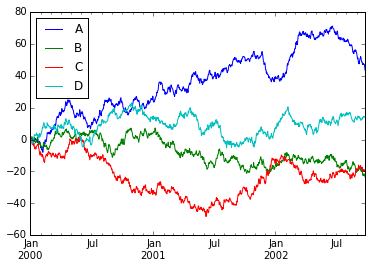

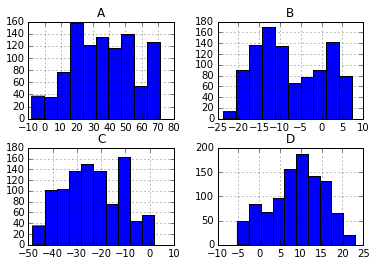

In [9]:
df.plot()
df.hist()

In [11]:
from ggplot import *
df.plot()
df.hist()

ImportError: No module named ggplot